# Models in Physics

Hard disks, which are idealized simulations of billiard balls, move as free particles when they are not in contact with each other or with a wall and obey simple reflection laws when they come into contact with each other.
<p/>
We will see that in the statistical approach any two configurations of hard disks must be sampled with equal probability.
<p/>
In the tutorial we will conect the equiprobability concept, a basic version of the Boltzmann distribution, with the central notions of statistical mechanics - namely, the partition function, the free energy, the face base volume, and the various expansions.
<p/>
In the homework, we will check that the Newtonian results perfectly agree with the statistical approach.


# Molecular Dynamics for Hard Disks (Newtonian Mechancs) 

<img style="max-width:396px;float:right" src="event_disks_box_movie/0000.png"/>
## The event driven molecular dynamics algorithm
<p/>
The dynamics of this system consists of straight line evolution up to the next event. This event may consist of wall collisions with incomminf angle equal to outgoing angle. There are also pair collisions where the velocities change according to the rules of an idealized billiard without the complications of real systems such as torque or friction.
<p/>
The event driven molecular dynamics algorithm invented by Alder and Weinwright in 1957. It solves the Newtonian dynamics of the system without any approximation.

# Tutorial
<p/>
In the lecture we studied molecular hard disks with two approaches. Molecular dynamics (event_diska.py), ad the solution given by Boltzmann statistical mechanics. For hard disks, Boltzmann statistical mechanics means equal weights for all legal configurations. Also, Boltzmann and Newton are equivalent for all thermo dynamic properties. This is, for all properties that do not depend directly on time.

## The Equal-Probability principle and hard disks

The equiprobability principle is one of the pillars of statistical physics. This principle states that the probability $ \pi(a) $ of a configuration is a function of the energy of the configuration:
<p/>
$$ \pi(a) = \pi(E(a)) $$
<p/>
For hard disks all configurations have the same energy $E = 0$. This gives the same weight to each configuration:
<p/>
$$ \pi(a) = \pi(b) = \pi(c) $$
<p/>
The Monte Carlo algorithm must sample configurations with equal probability. This was acheived by the direct sampling Monte Carlo algorithm employing the tableu rosa rule. But why don't we simply try to place the disk causing the conflict into a new position until it finally finds its proper place? This algorithm is called Random Sequential Deposition and it is important for adhesion and catalysis but <em>not</em> for equilibrium statistical physics. Its configurations are not equally probable as you will see using two arguments.

## The discrete hard rod model
<p/>
Consider a discrete hard rod model - a one dimensional discrete version of hard disks.

<div style="float:right">
a $1/4 \cdot 1/2 = 1/8$
<p/>
b $1/4 \cdot 1/2 = 1/8$
<p/>
c $1/4 \cdot 1 = 1/4$
<br/>
<br/>
<br/>
d $1/4 \cdot 1 = 1/4$
<p/>
e $1/4 \cdot 1/2 = 1/8$
<p/>
f $1/4 \cdot 1/2 = 1/8$
</div>



Clearly we have violated the equiprobability principle but if we implement the tableu rasa algorithm we would have:

In [1]:
# direct_discrete.py
import random

configurations = {(0, 3): 'a', (0, 4): 'b', (1, 4): 'c',
                  (3, 0): 'd', (4, 0): 'e', (4, 1): 'f'}
counts = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0}
n_runs = 10000
for run in range(n_runs):
    while True:
        red_rod = random.randint(0, 4)
        blue_rod = random.randint(0, 4)
        if abs(red_rod - blue_rod) > 2: break
    conf = configurations[(red_rod, blue_rod)]
    counts[conf] += 1
for conf in counts:
    print(conf, counts[conf] / float(n_runs))


a 0.1651
b 0.1693
c 0.161
d 0.1692
e 0.1631
f 0.1723


There are 25 configurations of legal and illegal configurations possible in the discrete hard rod model. There are a total of 6 legal configurations. Each configuration has a 1/25 chance of occuring. Using the tabla rasa algorithm, there is a 1/6 chance of choosing 1 of the legal probabilities. The table rasa algorithm reduces the event space in the discrete rod model from 25 possible configurations to 6 legal configurations. As a result, we get equal probabilities for each of the 6 legal configurations and the equiprobability principle is satisfied.

In [2]:
#direct_disks_box_slow.py
import random

N = 4
sigma = 0.2
pairs = [(i, j) for i in range(N - 1) for j in range(i + 1, N)]
print(pairs)
while True:
    L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma)) for k in range(N)]
    if  min((L[i][0] - L[j][0]) ** 2 + (L[i][1] - L[j][1]) ** 2 for i, j in pairs) > 4.0 * sigma ** 2: 
        break
print (L)


[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
[(0.6850456141184543, 0.2191888212420641), (0.24884231086927439, 0.3177567574710217), (0.3184487827565954, 0.7196251419302773), (0.7541240413381289, 0.6320106894837949)]


Because we do not check for overlaps, each point in this eight dimensional space (two dimensions for each of four hard disks) is sampled with equal probability. The vector L is a uniform random vector in an eight dimensional hypercube from sigma to 1-sigma in all dimensions. We then cut out peices from this hypercube with the overlap condition. This is analogous to the discrete hard ros model where we throw away 19 of 25 configurations.

# The partition function for hard disks
<p/>
Here we deepen our understanding of the hard disk model no longer using walls but instead periodic boundry conditions.
<p/>
<b>Periodic Boundry Conditions</b>
<p/>
In the case of periodic boundry conditions, when a disk is placed slightly beyond the right side of the boundry box, it also appears on the left of the boundry box. Under these circumstances, two disks can overlap if one is in the lower rught corner and the other is in the upper right corner.
<p/>
In a system with periodic boundry conditions, walls play no role.


In [3]:
#direct_disks_multirun.py
#The hard disks model with periodic boundry conditions
import random, math

def dist(x,y):
    d_x = abs(x[0] - y[0]) % 1.0
    d_x = min(d_x, 1.0 - d_x)
    d_y = abs(x[1] - y[1]) % 1.0
    d_y = min(d_y, 1.0 - d_y)
    return  math.sqrt(d_x**2 + d_y**2)
    
def direct_disks(N, sigma):
    n_iter = 0
    condition = False
    while condition == False:
        n_iter += 1
        L = [(random.random(), random.random())]
        for k in range(1, N):
            a = (random.random(), random.random())
            min_dist = min(dist(a, b) for b in L) 
            if min_dist < 2.0 * sigma: 
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return n_iter, L

N = 16
eta = 0.20
sigma = math.sqrt(eta / N / math.pi)
n_runs = 100
print ('Note that this program might take a while!')
for run in range(n_runs):
    iterations, config =  direct_disks(N, sigma)
    print ('run',run)
    print (iterations - 1, 'tabula rasa wipe-outs before producing the following configuration')
    print (config)
    print()



Note that this program might take a while!
run 0
5319 tabula rasa wipe-outs before producing the following configuration
[(0.10037865977357996, 0.988845305639597), (0.894261872392964, 0.5204055046794247), (0.7759616513847003, 0.4214712454480489), (0.3978898329870225, 0.31782025530554636), (0.7201670879364044, 0.8062447824005411), (0.24227884771099195, 0.8889387089513087), (0.7568029792991656, 0.06490101314848928), (0.5164050816310282, 0.8636221934530195), (0.0915225131462778, 0.4792419094223991), (0.28600276495534327, 0.051824193600853774), (0.005057752208083688, 0.24422747713961845), (0.5311614368089669, 0.4403697867241827), (0.570696575987006, 0.2670296143983577), (0.17235164192221186, 0.3767096708144041), (0.6134816225942067, 0.738398472398649), (0.8494939002554884, 0.24976272647370334)]

run 1
860 tabula rasa wipe-outs before producing the following configuration
[(0.23284565411448432, 0.6652696477940439), (0.22201857226699218, 0.15315032054172628), (0.7560888405806517, 0.873131041

run 11
3505 tabula rasa wipe-outs before producing the following configuration
[(0.9557937785202365, 0.10081213910690978), (0.39725639180473526, 0.9925475729132321), (0.5981645570028169, 0.9825749860442803), (0.7885316286880464, 0.6924963376345098), (0.3062736470549331, 0.279263579647118), (0.8904268201392143, 0.6022040903643435), (0.6133936056940502, 0.8211473359573003), (0.21981346854666728, 0.5550684824334925), (0.03631142151971911, 0.7726378054827072), (0.3706117452627814, 0.6723490716025274), (0.12653047439220855, 0.9248434405693129), (0.5003426765224979, 0.8793577270018276), (0.16205769831693517, 0.0848996628938039), (0.5099205007769431, 0.30953775466617495), (0.5240260743576012, 0.6346476918142421), (0.3219034462573006, 0.11969357559409133)]

run 12
579 tabula rasa wipe-outs before producing the following configuration
[(0.08956183218690295, 0.9600570660316642), (0.6713946112160872, 0.7677841065187587), (0.1293616094246074, 0.5267082590341519), (0.27152767834158076, 0.2678941753

run 22
1733 tabula rasa wipe-outs before producing the following configuration
[(0.8991453897488926, 0.9495020022945043), (0.37363406461246507, 0.7687164497634699), (0.4318953956847752, 0.65071322883262), (0.027614715960252556, 0.07912331856839105), (0.17370899072700818, 0.6969237031160859), (0.21558803392555703, 0.9078801591900449), (0.42295050197367146, 0.3724771880637717), (0.7482041481920404, 0.714517046580649), (0.8221906999330247, 0.1954180242543474), (0.9167511469701016, 0.6441061091835775), (0.04778995431344757, 0.3547229651504835), (0.6848708408514738, 0.2411172368746508), (0.4046033322716973, 0.9214484749418167), (0.8658032460181749, 0.32998924962141607), (0.5234544233670151, 0.22050482820891903), (0.6885594308238281, 0.5177679880567918)]

run 23
1983 tabula rasa wipe-outs before producing the following configuration
[(0.5747246136876175, 0.5651876836971752), (0.03784820444935155, 0.7263624470241141), (0.6491881020214602, 0.9124164521365765), (0.3928435068062539, 0.5034235488

run 33
2919 tabula rasa wipe-outs before producing the following configuration
[(0.8967250406757359, 0.8586971151901448), (0.20880388424859464, 0.5455757147505188), (0.8038482477800354, 0.555105074808743), (0.30803292255170633, 0.4352396129352143), (0.18614611783348156, 0.28042019235943294), (0.16010521394883392, 0.672925849332604), (0.3467419575101758, 0.7418574401085647), (0.5212533957351261, 0.1446496104310211), (0.9748205207220846, 0.10170625365318575), (0.5039411406438132, 0.42896264002377993), (0.015684514071380717, 0.24825326318447738), (0.7166055124326041, 0.1628747448903054), (0.053609751271679995, 0.9199093327478882), (0.42021750954103787, 0.9453119040308103), (0.08458547841825381, 0.7854210060861231), (0.6934674350009662, 0.31794799225733006)]

run 34
4 tabula rasa wipe-outs before producing the following configuration
[(0.1116975630133682, 0.19995577112717933), (0.9594767653901553, 0.890350193993402), (0.20076576717726702, 0.6615923185253586), (0.9816879591130782, 0.3364177

run 44
6535 tabula rasa wipe-outs before producing the following configuration
[(0.1058681885032905, 0.21441687651404662), (0.3193715499595461, 0.7033681264536851), (0.05082814711851302, 0.008667524383579206), (0.9026355708327901, 0.8819414296133318), (0.4029958136534022, 0.05081218026719014), (0.3875465119300222, 0.5109081225254002), (0.5242443187909179, 0.19034025144218758), (0.7523876822523112, 0.7546765086486497), (0.5719241976472502, 0.9681551255026575), (0.7202356512969887, 0.3249288539202201), (0.07513786923956689, 0.666516643997571), (0.9221827864247761, 0.36987541986204564), (0.8588823331788784, 0.09509488614142791), (0.912003257809512, 0.21604961325864247), (0.09532849707240232, 0.838703253903086), (0.3527045598883469, 0.1886193603531876)]

run 45
4070 tabula rasa wipe-outs before producing the following configuration
[(0.1579983052801216, 0.15732559099609678), (0.054891101457789526, 0.24017491157186832), (0.39957359796834946, 0.6947053245659999), (0.9545761449745629, 0.98516

run 55
2906 tabula rasa wipe-outs before producing the following configuration
[(0.31640748081942194, 0.14032026513331675), (0.9184057674051289, 0.6552463429728858), (0.09827188625860539, 0.24195344762010162), (0.08150831357105182, 0.958828544718643), (0.43767322496366323, 0.8193585759311978), (0.6505123766886981, 0.3575227545462757), (0.6295858416576219, 0.6682202872206088), (0.9692493598678376, 0.2569513113920826), (0.7471403886924419, 0.44441049834451163), (0.5193538256379662, 0.2596184412397674), (0.34518831630483415, 0.32621729368725116), (0.41612552233656097, 0.6596712777107617), (0.4982512004853914, 0.4494848892978378), (0.7678055608878477, 0.047634960640834945), (0.7519136791624336, 0.8097798878086913), (0.7912272341111636, 0.2148342116177694)]

run 56
1032 tabula rasa wipe-outs before producing the following configuration
[(0.2864790816960181, 0.5827198144311623), (0.38244370111500914, 0.781945234199231), (0.08499809200118713, 0.7718407475191376), (0.7640538975221965, 0.480007

run 68
664 tabula rasa wipe-outs before producing the following configuration
[(0.31889164745080834, 0.8273564525568106), (0.005095753111110213, 0.9680350533685473), (0.4136250398099257, 0.7411163370564825), (0.39851309510941046, 0.096529319725143), (0.2667329289775151, 0.28979497183602243), (0.07325485369193352, 0.6197676941829697), (0.6922044441397128, 0.33148308151528405), (0.17512990652521832, 0.8677852488843162), (0.17935650628188482, 0.494612120397237), (0.678555439905356, 0.7202803053955465), (0.02709396734205094, 0.40534020695837103), (0.4698597180921038, 0.39593707060425776), (0.806140200858458, 0.4177550659706376), (0.20422641476827186, 0.6625299670466162), (0.6482373716276568, 0.590048285124995), (0.6076866480897516, 0.1666725242601269)]

run 69
514 tabula rasa wipe-outs before producing the following configuration
[(0.7214485815704937, 0.2939511227453184), (0.26736711807142854, 0.8062102380886715), (0.04123130624656601, 0.3927403114260677), (0.38548363267930164, 0.347655636

run 82
1303 tabula rasa wipe-outs before producing the following configuration
[(0.30793932282464886, 0.7639687602748076), (0.9854243105505701, 0.08331709266849918), (0.7813404559630224, 0.07024188069763726), (0.4365007872623978, 0.7383475582840411), (0.1816607972366001, 0.7186069419636961), (0.42178906005463623, 0.07369841743991401), (0.7847447102888764, 0.6395406009991184), (0.29652783316345954, 0.20793484915604454), (0.5905892546964914, 0.04340166026898007), (0.07774124088587353, 0.43328154346817227), (0.8985682423205854, 0.5336036120985475), (0.45956515021455036, 0.5536321543097635), (0.06224296175434374, 0.8684716395179091), (0.2533278171453943, 0.3547367322907071), (0.6632353617485036, 0.15148767749846892), (0.13769810076401534, 0.1205394417908856)]

run 83
701 tabula rasa wipe-outs before producing the following configuration
[(0.0886836349305562, 0.593812699514029), (0.5369700880763585, 0.8622670005314078), (0.09707926208383788, 0.089150022219329), (0.444478743626018, 0.1693487

run 93
2561 tabula rasa wipe-outs before producing the following configuration
[(0.2245241869041772, 0.5901918541570561), (0.32896219283620887, 0.6734820852218435), (0.45709476403008686, 0.6687649968613549), (0.9317511351827645, 0.8203627818458397), (0.6397495772044306, 0.6721573485026414), (0.7602195701910551, 0.8167674798628867), (0.857832007117559, 0.36825196117056436), (0.42201384336681713, 0.09330929583746272), (0.22858318775623276, 0.17911820202603512), (0.7252524406314438, 0.9515996624627063), (0.02427334459373165, 0.3457252832834157), (0.2737723666311742, 0.9841345027591634), (0.15799286546043922, 0.4625756767511031), (0.12303856419421777, 0.03217975798775896), (0.656664065598343, 0.5189842690090074), (0.07248702226863268, 0.5841832458984549)]

run 94
5110 tabula rasa wipe-outs before producing the following configuration
[(0.6046111891924993, 0.9646224848973992), (0.881257623871866, 0.8990357071900232), (0.06841231131401582, 0.49418453855721567), (0.11184046292222949, 0.678499

Now we are considering 16 disks. So N = 16 and we set the density $\eta$; that is, if $\eta$ is set to 0.3 than 30% of the space is occupied by disks. For a 1 x 1 box with 16 disks, the radius of each hard disk is given by:
<p/>
$$ 16 \pi \sigma^2 \approx 0.3 $$
<p/>
We typically have to reject over 100,000 configurations before having a single legal configuration. This means our algorithm is exact, but very bad because the acceptance ratio is very small. For a system of 16 disks with a density of 0.3 the acceptance ratio is on the order of $5 \times 10^{-6}$.
<p/>
$$ \mathcal{p}_{accept} = 5 \times 10^{-6} $$
<p/>
With 16 disks which means our configuration space has 32 dimensions. Our 1 x 1 box with 32 dimensional space has a volume $V^{16}$
<p/>
$$ V^N \quad \text{ where N is the number of disks } $$
<p/>
If the system has a density equal to zero, which means the radius of the hard disk is zero, all points of the configuration space are legal. So the number of legal configurations, which is the partition function of this system, is $V^N$.
<p/>
$$ \left \{ \begin{matrix} \text{number of} \\ \text{legal configurations} \\ \text{for density 0} \end{matrix} \right \} = Z(\eta = 0) = \int_V \partial x_0 \dots \int_V \partial x_{N-1} = V^N $$
<p/>
at density 0 $\mathcal{p}_{accept} = 1. We found that at density = 0.3 the acceptance ratio is:
<p/>
$$ \eta = 0.3, \quad N = 16, \quad \mathcal{p}_{accept} = 5 x 10^{-6} $$
<p/>



This means that the number of legal configurations is 200,000 times smaller than the volume of the original 32 dimensioal space.
<p/>
$$ \left \{ \begin{matrix} \text{number of} \\ \text{legal configurations} \\ \text{for density 0.3} \end{matrix} \right \} = Z(\eta = 0.3) = \int_V \partial x_0 \dots \int_V \partial x_{N-1} = Z(0) \cdot \mathcal{p}_{accept}(\eta = 0.3)$$
<p/>
The partition function of the hard disks is equal to the product of the partition function at density zero and the acceptance ratio at density $\eta$. 
<p/>
The partition function is a central object in equlibrium statistical mechanics. At sero density, that is to say, for zero radius, it clearly leads to a valid configuration of hard disks for every iteration. This is also the case for densities equal to 0.0001. In contrast, at higher densities, the radius is larger and the points lead to configurations that are illegal. In fact, from these 16 points you can obtain a legal hard disk configuration for all values of the radius that are half the distance between the closest two disks. In the present configuration, the value $\sigma_{max}$ of this maximal hard disk radius is equal to 0.025. This corresponds to a maximal density of $\eta_{max} = 0.03143$.
<p/>
You may consider the probability distribution $\pi(\eta_{max})$ as related to the maximal density and from it you can reconstruct the probability distribution $\pi(\eta)$ at the acceptance ratio of the direct sampling algorithm.
<p/>
$$\mathcal{p}_{accept}(\eta) = 1 - \int_0^{\eta} \partial \eta_{max} \cdot \pi(\eta_{max})$$



# Virial Expansion
<p/>
<img style="float:right" src="acceptance-density-semi-log.png"/>
If we plot acceptance rate is plotted against density, for 16 disks, we obtain the graph shown and we see that it decays faster than an exponential rate.
<p/>
We will now obtain an approximation of the acceptance rate and of the partition function for hard disks. This will be excellent at the limit of small disks and valid for any value of N.
<p/>
Consider the following N = 16 points in a box with periodic bounding conditions. This configuration is described by the set of vectors:
<p/>
$$x_0 = (x_0,y_0), \space x_1 = (x_1,y_1), \space \cdots, \space x_{N-1} = (x_{N-1}, y_{N-1})$$
<p/>
Each of these vectors contains the two spatial coordinates of the points x and y. For relatively small radi, this configuration will be allowed. In general this configuration will be valid provided that the distance between disk 0 and disk 1, disk 0 and disk 2, ect... are all larger than 2$\sigma$. If one of these coordinates is not met then the configuration is illegal. We write these conditions in integral form as follows:
<p/>
$$Z(\eta) = \int d x_0 \cdots d x_{N-1} \underbrace{[1 - \Upsilon(x_0,x_1)][1 - \Upsilon(x_0,x_1)]\cdots[1 - \Upsilon(x_0,x_1)]}_{\frac 1 2 N(N-1) \space factors} $$
<p/>
This integral runs over the 2 N components of the N vectors of the configuration.
<p/>
Upsilon is equal to 1 if there is an overlap and 0 otherwise.
<p/>
$$ \Upsilon (x_k, x_l) = \left \{ 
\begin{array}{ll} 1 
\text{ if dist}(x_k,x_l) < 2\sigma \\ 
0\text{ otherwise} 
\end{array}  
\right . 
$$
<p/>
Note that if one of these brackets is equal to zero then the contribution of the configuration vanishes in the integral.
<p/>
This configuration of the partition function is exact but no one has been able to compute it analytically.


This expression of the partition function is exact but no one has been able to compute it analytically. Imagine that each of the brackets is equal to 1 (there is no overlap). In this case the expression evaluates to 1 and the entire expression is equivelant to $V^N$. This is the case when the radius is reduced to zero.
<p/>
To get to the next order, select the $\Upsilon$ value in one of the brackets and 1's for all the others.
<p/>
$$ \int d x_k \cdot d x_l \cdot \Upsilon (x_k, x_l) = V \int d x_k \cdot \Upsilon d x_k \cdot \Upsilon (x_k, x_l) $$
<p/>
Thanks to the invarience by translation and the periodic boundry condition, it reduces to V times a two dimensional integral.
<p/>
<img style="float:right" src="excluded-region.png"/>
We observe that the excluded region corresponds to a disk of radius 2$\sigma$. This allows us to compute the integral as follows.
<p/>
$$ \int d x_k d x_l \Upsilon(x_k, x_l) = V \int d x_k \Upsilon(x_k, x_l) = V 4 \pi \sigma^2 $$
<p/>
Now we can come back to the full expression of the partition function and, if we stop the evaluation at this term, we obtain the following expression:
<p/>
$$ Z(\eta) = V^N ( 1 - 4 \pi \sigma^2 \frac {N(N-1)} {2V} + \cdots \approx V^N \underbrace{exp[-2 (N-1) \eta]}_{\mathcal{p}_{accept}} $$
<p/>
For large N this behaves as $V^N$ times the exponential of -(N-1) times $\eta$. This means that the acceptance probability decays exponentially with both the density and the number N of particles.


c:\users\jgambini\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


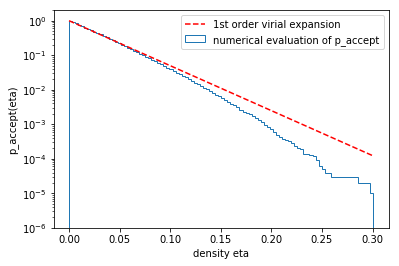

In [6]:
#direct_disks_any.py

import random, math, pylab

def dist(x, y):
    d_x = abs(x[0] - y[0]) % 1.0
    d_x = min(d_x, 1.0 - d_x)
    d_y = abs(x[1] - y[1]) % 1.0
    d_y = min(d_y, 1.0 - d_y)
    return  math.sqrt(d_x**2 + d_y**2)
    
N = 16
n_confs = 10 ** 5
pairs = [(i, j) for i in range(N - 1) for j in range(i + 1, N)]
eta_max_list = []
for conf in range(n_confs):
    L = [(random.random(), random.random()) for k in range(N)]
    sigma_max = min(dist(L[i], L[j]) for i, j in pairs) / 2.0
    eta_max = N * math.pi * sigma_max ** 2
    eta_max_list.append(eta_max)

# Begin of graphics output
pylab.figure()
n, bins, patches = pylab.hist(eta_max_list, 100, histtype='step', cumulative=-1, 
                   log=True, normed=True, label="numerical evaluation of p_accept")
explaw = [math.exp( - 2.0 * (N - 1) * eta) for eta in bins]
pylab.plot(bins, explaw, 'r--', linewidth=1.5, label="1st order virial expansion")
pylab.xlabel('density eta')
pylab.ylabel('p_accept(eta)')
pylab.legend()
pylab.show()



Notice that the analytical prediction matches very well the numerical results in the low density regime where the partition function is proportional to $V^N$ .

To obtain an extensive quantity in physics we take the logarithm of this quantity:
<p/>
$$ log Z(\eta) = N log V - Z(N-1)\eta + \cdots $$
<p/>
<b>Why this expression corresponds to a Virial Expansion</b>
<p/>
First we differentiate $log Z(\eta)$ with respect to V:
<p/>
$$ \frac {\partial log Z(\eta)} {\partial V} = \frac N V + 2 N (N-1)\pi \sigma^2 \frac 1 {V^2} + \cdots $$
<p/>
Then multiply by $\frac V N$:
<p/>
$$ \frac V N \frac {\partial log Z(\eta)} {\partial V} = 1 + 2(N-1)\pi \sigma^2 \frac 1 V + \cdots + (\cdots) \frac 1 {V^2} + (\cdots) \frac 1 {V^3} + \cdots $$
<p/>
The first term is a constant equal to 1 corresponding to $V^N$ - the ideal hard disks with radius 0.
<p/>
The next term is proportional to $\frac 1 V$. In fact we obtain this term because we consider only the term with only one $\Upsilon$ in the expansion.
<p/>
We could go on in this expansion of the brackets and consider pairs of Upsilons, triplets, and so on. This would yield an expansion in powers of $\frac 1 V$.

However this is not the state of the art of statistical mechanics for the 21<sup>st</sup> century. In 1874 Ludwig Boltzmann computed the 4<sup>th</sup> term at the virial expansion - that is to say the term $\frac 1 {V^3}$. It was for three dimensional hard spheres.
<p/>
The virial expansion was once beleived to provide systematic access to the thermodynamics of liquids and gases, in our case, hard disks. But for virial expansion this is not the case anymore. What is proven today is that this expansion is valid only up to some finite values of the density $\eta$. However, it cannot predict the existence of a phase transition.

# Homework
<p/>
Check that equiprobability is satisfied in direct_disks_box.py. Check it not for all legal configurations, but for the three configurations (a, b, c) shown below. The probability to hit any of these configurations exactly is of course zero, so we must put little boxes around them.
<p/>
Using small boxes [x - del_xy, x + del_xy], etc, modify the program direct_disks_box_multirun.py to show that the probability to sample configurations a, b, and c are the same (within the numerical precision), with:
<p/>
a = ((0.30, 0.30), (0.30, 0.70), (0.70, 0.30), (0.70,0.70))<br/>
b = ((0.20, 0.20), (0.20, 0.80), (0.75, 0.25), (0.75,0.75))<br/>
c = ((0.30, 0.20), (0.30, 0.80), (0.70, 0.20), (0.70,0.70))<br/>


In [51]:
#direct_disks_box_multirun.py
import random, math
def direct_disks_box(N, sigma):
    condition = False
    while condition == False:
        L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))]
        for k in range(1, N):
            a = (random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))
            min_dist = min(math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) for b in L)
            if min_dist < 2.0 * sigma:
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return L


sigma = 0.15
del_xy = 0.1
n_runs = 1000000
conf_a = ((0.30, 0.30), (0.30, 0.70), (0.70, 0.30), (0.70,0.70))
conf_b = ((0.20, 0.20), (0.20, 0.80), (0.75, 0.25), (0.75,0.75))
conf_c = ((0.30, 0.20), (0.30, 0.80), (0.70, 0.20), (0.70,0.70))
configurations = [conf_a, conf_b, conf_c]
hits = {conf_a: 0, conf_b: 0, conf_c: 0}
for run in range(n_runs):
    x_vec = direct_disks_box(4, sigma)
    for conf in configurations:
        condition_hit = True
        for b in conf:
            condition_b = min(max(abs(a[0] - b[0]), abs(a[1] - b[1])) for a in x_vec) < del_xy
            condition_hit *= condition_b
        if condition_hit:
            hits[conf] += 1

for conf in configurations:
    print (conf, hits[conf])

KeyboardInterrupt: 

In [44]:
#modified markov_disks_box.py
import random

def markov_disks_box(delta, sigma):
    a = random.choice(L)
    b = [a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta)]
    min_dist = min((b[0] - c[0]) ** 2 + (b[1] - c[1]) ** 2 for c in L if c != a)
    box_cond = min(b[0], b[1]) < sigma or max(b[0], b[1]) > 1.0 - sigma
    if not (box_cond or min_dist < 4.0 * sigma ** 2):
        a[:] = b
    return L

    
    
L = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
sigma = 0.15
sigma_sq = sigma ** 2
delta = 0.1
del_xy = 0.05
n_steps = 1000000
conf_a = ((0.30, 0.30), (0.30, 0.70), (0.70, 0.30), (0.70,0.70))
conf_b = ((0.20, 0.20), (0.20, 0.80), (0.75, 0.25), (0.75,0.75))
conf_c = ((0.30, 0.20), (0.30, 0.80), (0.70, 0.20), (0.70,0.70))
configurations = [conf_a, conf_b, conf_c]
hits = {conf_a: 0, conf_b: 0, conf_c: 0}
for steps in range(n_steps):
    x_vec = markov_disks_box(delta,sigma)
    for conf in configurations:
        condition_hit = True
        for b in conf:
            condition_b = min(max(abs(a[0] - b[0]), abs(a[1] - b[1])) for a in x_vec) < del_xy
            condition_hit *= condition_b
        if condition_hit:
            hits[conf] += 1

for conf in configurations:
    print (conf, hits[conf])
    


((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 117
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 134
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 103


In [57]:
#event_disks_box.py
import math, pylab, time

def wall_time(pos_a, vel_a, sigma):
    if vel_a > 0.0:
        del_t = (1.0 - sigma - pos_a) / vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma) / abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    Upsilon = scal ** 2 - del_v_sq * ( del_x_sq - 4.0 * sigma **2)
    if Upsilon > 0.0 and scal < 0.0:
        del_t = - (scal + math.sqrt(Upsilon)) / del_v_sq
    else:
        del_t = float('inf')
    return del_t

conf_a = ((0.30, 0.30), (0.30, 0.70), (0.70, 0.30), (0.70,0.70))
conf_b = ((0.20, 0.20), (0.20, 0.80), (0.75, 0.25), (0.75,0.75))
conf_c = ((0.30, 0.20), (0.30, 0.80), (0.70, 0.20), (0.70,0.70))
configurations = [conf_a, conf_b, conf_c]
hits = {conf_a: 0, conf_b: 0, conf_c: 0}
del_xy = 0.10
pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
sigma = 0.10
t = 0.0
millis = int(round(time.time() * 1000))
n_events = 5000000
for event in range(n_events):
    if event % 100000 == 0:
        print (event)
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l  in singles]
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    next_event = min(wall_times + pair_times)
    t_previous = t
    for inter_times in range(int(t + 1), int(t + next_event + 1)):
        del_t = inter_times - t_previous
        for k, l in singles:
            pos[k][l] += vel[k][l] * del_t
        t_previous = inter_times
        for conf in configurations:
            condition_hit = True
            for b in conf:
                condition_b = min(max(abs(a[0] - b[0]), abs(a[1] - b[1])) for a in pos) < del_xy
                condition_hit *= condition_b
            if condition_hit:
                hits[conf] += 1
    t += next_event
    del_t = t - t_previous
    for k, l in singles:
        pos[k][l] += vel[k][l] * del_t
    if min(wall_times) < min(pair_times):
        collision_disk, direction = singles[wall_times.index(next_event)]
        vel[collision_disk][direction] *= -1.0
    else:
        a, b = pairs[pair_times.index(next_event)]
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2)
        e_perp = [c / abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        for k in range(2):
            vel[a][k] += e_perp[k] * scal
            vel[b][k] -= e_perp[k] * scal

print(int(round(time.time() * 1000)) - millis)
print(t)
for conf in configurations:
    print (conf, hits[conf])

0


KeyboardInterrupt: 

c:\users\jgambini\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


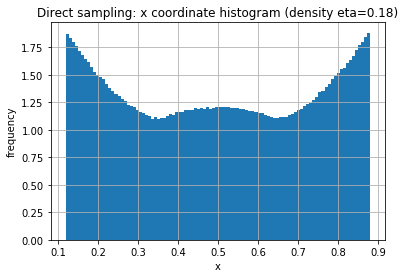

In [69]:
# direct_disks_box_multirun.py
import random, pylab

def direct_disks_box(N, sigma):
    overlap = True
    while overlap == True:
        L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))]
        for k in range(1, N):
            a = (random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))
            min_dist_sq = min(((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) for b in L)
            if min_dist_sq < 4.0 * sigma ** 2:
                overlap = True
                break
            else:
                overlap = False
                L.append(a)
    return L


N = 4
sigma = 0.1197
n_runs = 1000000
histo_data = []
for run in range(n_runs):
    pos = direct_disks_box(N, sigma)
    for k in range(N):
        histo_data.append(pos[k][0])
pylab.hist(histo_data, bins=100, normed=True)
pylab.xlabel('x')
pylab.ylabel('frequency')
pylab.title('Direct sampling: x coordinate histogram (density eta=0.18)')
pylab.grid()
pylab.savefig('direct_disks_histo.png')
pylab.show()

c:\users\jgambini\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


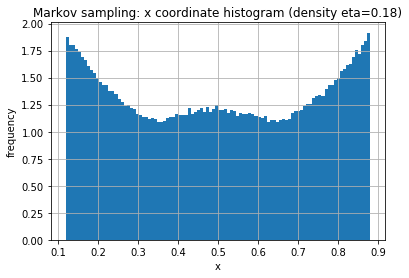

In [96]:
# modified_markov_disks_box_histogram.py

import random, pylab

def markov_disks_box(delta, sigma):
    a = random.choice(L)
    b = [a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta)]
    min_dist = min((b[0] - c[0]) ** 2 + (b[1] - c[1]) ** 2 for c in L if c != a)
    box_cond = min(b[0], b[1]) < sigma or max(b[0], b[1]) > 1.0 - sigma
    if not (box_cond or min_dist < 4.0 * sigma ** 2):
        a[:] = b
    return L

L = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
sigma = 0.1197
sigma_sq = sigma ** 2
delta = 0.1
n_steps = 2000000
histo_data = []
for steps in range(n_steps):
    x_vec = markov_disks_box(delta,sigma)
    for disk in L:
        histo_data.append(disk[0])

pylab.hist(histo_data, bins=100, normed=True)
pylab.xlabel('x')
pylab.ylabel('frequency')
pylab.title('Markov sampling: x coordinate histogram (density eta=0.18)')
pylab.grid()
pylab.savefig('markov_disks_histo.png')
pylab.show()

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
306530
485908.78806467407
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 28
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 40
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 24


c:\users\jgambini\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


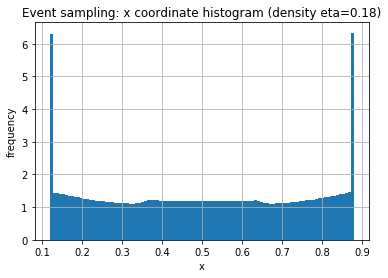

In [95]:
# modified_event_disks_box_histo.py
import math, pylab

#event_disks_box.py
import math, pylab, time

def wall_time(pos_a, vel_a, sigma):
    if vel_a > 0.0:
        del_t = (1.0 - sigma - pos_a) / vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma) / abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    Upsilon = scal ** 2 - del_v_sq * ( del_x_sq - 4.0 * sigma **2)
    if Upsilon > 0.0 and scal < 0.0:
        del_t = - (scal + math.sqrt(Upsilon)) / del_v_sq
    else:
        del_t = float('inf')
    return del_t

del_xy = 0.10
pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
sigma = 0.1197
t = 0.0
millis = int(round(time.time() * 1000))
n_events = 5000000
hist_data = []
for event in range(n_events):
    if event % 100000 == 0:
        print (event)
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l  in singles]
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    next_event = min(wall_times + pair_times)
    t_previous = t
    for inter_times in range(int(t + 1), int(t + next_event + 1)):
        del_t = inter_times - t_previous
        for k, l in singles:
            pos[k][l] += vel[k][l] * del_t
        t_previous = inter_times
    t += next_event
    del_t = t - t_previous
    for k, l in singles:
        pos[k][l] += vel[k][l] * del_t
    for k in range(4):
        hist_data.append(pos[k][0])
    if min(wall_times) < min(pair_times):
        collision_disk, direction = singles[wall_times.index(next_event)]
        vel[collision_disk][direction] *= -1.0
    else:
        a, b = pairs[pair_times.index(next_event)]
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2)
        e_perp = [c / abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        for k in range(2):
            vel[a][k] += e_perp[k] * scal
            vel[b][k] -= e_perp[k] * scal

print(int(round(time.time() * 1000)) - millis)
print(t)
for conf in configurations:
    print (conf, hits[conf])    
pylab.hist(hist_data, bins=100, normed=True)
pylab.xlabel('x')
pylab.ylabel('frequency')
pylab.title('Event sampling: x coordinate histogram (density eta=0.18)')
pylab.grid()
pylab.savefig('event_disks_histo.png')
pylab.show()